In [ ]:
%matplotlib inline

import pickle
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Retrieve current working directory (`cwd`)
cwd = os.getcwd()
cwd

# Data Story Telling and EDA
This contains 3 key data sets - 
1. Facebook Ad Insights - By Day and Creative
2. Google Analytics Channel Reportins - By and Channel Grouping
3. AdWords Ad Insights - By Day and Creative

We will look at each of these in order, and understand what kind of data we are exploring. 

In [ ]:
# Change directory 
os.chdir('/data')

# List all files and directories in current directory
os.listdir('.')

In [3]:
file = open("fb_all.pkl",'rb')
fb = pickle.load(file)
file.close()


'\nfile = open("ga_all.pkl",\'rb\')\nga = pickle.load(file)\nfile.close()\n\nfile = open("aw_all.pkl",\'rb\')\naw = pickle.load(file)\nfile.close()\n\n'

# Facebook Ad Insights
You can see that there are a 28 columns of observations. For now, I am mostly interested in the KPIs that relate to Purchases and Ad Performance (Reach, Impressions, Clicks) and Spend. Data cleaning steps have been taken during the import phase, so this pkl file is ready to be analyzed. 

In [4]:
fb.columns

Index([u'date', u'campaign_id', u'adset_id', u'ad_id', u'ad_name', u'reach',
       u'impressions', u'spend', u'shares', u'reactions', u'comments',
       u'avg_watch_time', u'link_clicks', u'outbound_clicks',
       u'purchases_1day_view', u'purchases_1day_click',
       u'purchases_7day_click', u'purchases_7day_view',
       u'purchases_28day_click', u'purchases_28day_view',
       u'purchases_value_1day_view', u'purchases_value_1day_click',
       u'purchases_value_7day_click', u'purchases_value_7day_view',
       u'purchases_value_28day_click', u'purchases_value_28day_view',
       u'conversions_1day_view', u'conversions_1day_click',
       u'conversions_7day_click', u'conversions_7day_view',
       u'conversions_28day_click', u'conversions_28day_view',
       u'conversion_value_1day_view', u'conversion_value_1day_click',
       u'conversion_value_7day_click', u'conversion_value_7day_view',
       u'conversion_value_28day_click', u'conversion_value_28day_view'],
      dtype='object

In [5]:
fb_day =  pd.pivot_table(fb,
                       values=['reach',
                                'impressions',
                                'spend',
                                'link_clicks',
                                'purchases_1day_view',
                                'purchases_1day_click',
                                'purchases_7day_click', 
                                'purchases_7day_view',
                                'purchases_28day_click',
                                'purchases_28day_view'],
                       index=['date'],
                       aggfunc=np.sum)

In [6]:
fb_day.head()

,impressions,link_clicks,purchases_1day_click,purchases_1day_view,purchases_28day_click,purchases_28day_view,purchases_7day_click,purchases_7day_view,reach,spend
date,,,,,,,,,,
2016-09-01,234818,5594.0,27.0,54.0,68.0,135.0,41.0,75.0,217637,2193.53
2016-09-02,170489,4071.0,30.0,28.0,82.0,112.0,50.0,54.0,160394,1778.52
2016-09-03,135324,3021.0,21.0,25.0,53.0,160.0,34.0,74.0,124987,1555.00
2016-09-04,242808,2589.0,18.0,30.0,43.0,218.0,33.0,89.0,226614,1670.94
2016-09-05,82980,924.0,5.0,15.0,11.0,147.0,6.0,53.0,80140,627.10


In [7]:
fb_day.describe()

,impressions,link_clicks,purchases_1day_click,purchases_1day_view,purchases_28day_click,purchases_28day_view,purchases_7day_click,purchases_7day_view,reach,spend
count,4.720000e+02,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,4.720000e+02,472.000000
mean,2.320400e+05,2246.703390,23.830508,41.110169,51.466102,100.322034,38.730932,70.510593,2.066150e+05,1698.339407
std,2.334478e+05,3247.833782,58.034737,74.958534,99.548359,135.614878,86.765991,104.762698,1.989104e+05,2002.007688
min,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,9.798200e+04,631.500000,0.000000,2.000000,3.000000,13.750000,1.000000,7.000000,8.960450e+04,484.005000
50%,1.534110e+05,1196.500000,3.000000,14.000000,14.000000,51.000000,6.000000,33.000000,1.436335e+05,856.570000
75%,2.888752e+05,2616.250000,17.000000,36.000000,54.000000,122.250000,34.000000,82.000000,2.375790e+05,2151.620000
max,1.424250e+06,33890.000000,631.000000,465.000000,1008.000000,761.000000,930.000000,658.000000,1.170130e+06,11467.380000


##Histograms of an 'average day' for each KPI

In [10]:
def binner(data):
    n_data = len(data)
    # Number of bins is the square root of number of data points: n_bins
    n_bins = np.sqrt(n_data)
    # Convert number of bins to integer: n_bins
    n_bins = int(n_bins)
    return n_bins

In [ ]:
plt.figure(1)
plt.suptitle('Facebook: I See Logs...', fontsize=16)
plt.subplot(421) 
n = int(np.sqrt((fb_day.reach).count()))
_ = plt.hist(fb_day.reach, bins=n)
_ = plt.xlabel('Reach')
_ = plt.ylabel('Days')
_ = plt.axis([0, 1500000, 0, 140])
_ = plt.xticks( rotation=25 )

plt.subplot(422) 
n = int(np.sqrt((fb_day.impressions).count()))
_ = plt.hist(fb_day.impressions, bins=n)
_ = plt.xlabel('Impressions')
_ = plt.ylabel('Days')
_ = plt.axis([0, 1500000, 0, 140])
_ = plt.xticks( rotation=25)

plt.subplot(423) 
n = int(np.sqrt((fb_day.purchases_1day_click).count()))
_ = plt.hist(fb_day.purchases_1day_click, bins=n)
_ = plt.xlabel('1day_click')
_ = plt.ylabel('Days')
_ = plt.axis([0, 700, 0, 400])

plt.subplot(424) 
n = int(np.sqrt((fb_day.purchases_1day_view).count()))
_ = plt.hist(fb_day.purchases_1day_view, bins=n)
_ = plt.xlabel('1day_view')
_ = plt.ylabel('Days')
_ = plt.axis([0, 700, 0, 400])

plt.subplot(425) 
n = int(np.sqrt((fb_day.purchases_7day_click).count()))
_ = plt.hist(fb_day.purchases_7day_click, bins=n)
_ = plt.xlabel('7day_click')
_ = plt.ylabel('Days')
_ = plt.axis([0, 700, 0, 400])

plt.subplot(426) 
n = int(np.sqrt((fb_day.purchases_7day_view).count()))
_ = plt.hist(fb_day.purchases_7day_view, bins=n)
_ = plt.xlabel('7day_view')
_ = plt.ylabel('Days')
_ = plt.axis([0, 700, 0, 400])

plt.subplot(427) 
n = int(np.sqrt((fb_day.purchases_28day_click).count()))
_ = plt.hist(fb_day.purchases_28day_click, bins=n)
_ = plt.xlabel('28day_click')
_ = plt.ylabel('Days')
_ = plt.axis([0, 700, 0, 400])

plt.subplot(428) 
n = int(np.sqrt((fb_day.purchases_28day_view).count()))
_ = plt.hist(fb_day.purchases_28day_view, bins=n)
_ = plt.xlabel('28day_view')
_ = plt.ylabel('Days')
_ = plt.axis([0, 700, 0, 400])


plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=1.5, hspace=1.0,
                    wspace=0.35)

plt.margins(0.2)

plt.show()


## Logs and The Internet
This is a famous feature of internet advertising data sets. The patterns has to do with Sales and Seasonal Cycles. In most instances, price is fixed at some level, the ads are running all the time, because some level of demand is constant for a given Brand+Product Mix. However, Holiday Gifting causes a shift in the Demand Curve, and Sales, which are price breaks change the Quanity Demanded during that time. It also comes with a lift in ad dollars. 

We can also assume, that smart Female Shoppers are aware of this, and shift their demand accordingly. 

Its also a good idea to create some industry standard features:
* Cost Per Click
* Cost Per Mille (1000 Impressions)
* Click Through Rate

In [12]:
fb_day['CPC'] = fb_day['spend'] / fb_day['link_clicks']
fb_day['CPM'] = (fb_day['spend'] * 1000) / fb_day['impressions']
fb_day['CTR'] = (fb_day['link_clicks'] / fb_day['impressions']) * 100


In [373]:
fb_day.describe()

,impressions,link_clicks,purchases_1day_click,purchases_1day_view,purchases_28day_click,purchases_28day_view,purchases_7day_click,purchases_7day_view,reach,spend,CPC,CPM,CTR
count,4.720000e+02,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,4.720000e+02,472.000000,472.000000,471.000000,472.000000
mean,2.320400e+05,2246.703390,23.830508,41.110169,51.466102,100.322034,38.730932,70.510593,2.066150e+05,1698.339407,0.970054,6.491708,inf
std,2.334478e+05,3247.833782,58.034737,74.958534,99.548359,135.614878,86.765991,104.762698,1.989104e+05,2002.007688,0.652914,2.622309,NaN
min,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.615309,0.151405
25%,9.798200e+04,631.500000,0.000000,2.000000,3.000000,13.750000,1.000000,7.000000,8.960450e+04,484.005000,0.532175,NaN,0.531437
50%,1.534110e+05,1196.500000,3.000000,14.000000,14.000000,51.000000,6.000000,33.000000,1.436335e+05,856.570000,0.817908,NaN,0.753153
75%,2.888752e+05,2616.250000,17.000000,36.000000,54.000000,122.250000,34.000000,82.000000,2.375790e+05,2151.620000,1.178376,NaN,1.131764
max,1.424250e+06,33890.000000,631.000000,465.000000,1008.000000,761.000000,930.000000,658.000000,1.170130e+06,11467.380000,4.060511,18.450269,inf


In [368]:
np.where(pd.isnull(fb_day.CPM))

(array([123]),)

In [372]:
fb_day.iloc[123,]

impressions              0.000000
link_clicks              5.000000
purchases_1day_click     0.000000
purchases_1day_view      0.000000
purchases_28day_click    0.000000
purchases_28day_view     0.000000
purchases_7day_click     0.000000
purchases_7day_view      0.000000
reach                    0.000000
spend                    0.000000
CPC                      0.000000
CPM                           NaN
CTR                           inf
Name: 2017-01-17 00:00:00, dtype: float64

In [375]:
fb_day.drop(fb_day.index[123], inplace=True)

In [376]:
fb_day.describe()

,impressions,link_clicks,purchases_1day_click,purchases_1day_view,purchases_28day_click,purchases_28day_view,purchases_7day_click,purchases_7day_view,reach,spend,CPC,CPM,CTR
count,4.710000e+02,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,4.710000e+02,471.000000,471.000000,471.000000,471.000000
mean,2.325327e+05,2251.462845,23.881104,41.197452,51.575372,100.535032,38.813163,70.660297,2.070537e+05,1701.945223,0.972114,6.491708,0.863758
std,2.334502e+05,3249.638910,58.086021,75.014220,99.625865,135.680014,86.839832,104.823536,1.988932e+05,2002.601447,0.652072,2.622309,0.492323
min,6.150000e+02,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.150000e+02,6.810000,0.154900,1.615309,0.151405
25%,9.849800e+04,633.000000,0.000000,2.000000,3.000000,14.000000,1.000000,7.000000,9.123500e+04,487.145000,0.533452,4.716785,0.530615
50%,1.535760e+05,1198.000000,3.000000,14.000000,14.000000,51.000000,6.000000,33.000000,1.436340e+05,856.870000,0.819686,6.178909,0.752138
75%,2.890215e+05,2616.500000,17.000000,36.000000,54.000000,122.500000,34.000000,82.000000,2.381980e+05,2165.590000,1.178999,7.614596,1.125257
max,1.424250e+06,33890.000000,631.000000,465.000000,1008.000000,761.000000,930.000000,658.000000,1.170130e+06,11467.380000,4.060511,18.450269,3.866468


# RegPlots
The interesting thing to note on both of these is the bounded CPC is unaffected by the amount spent, or the total number of impressions. This is intersting. CPM on the other hand does increase as you spend more, and attempt to reach more people. 

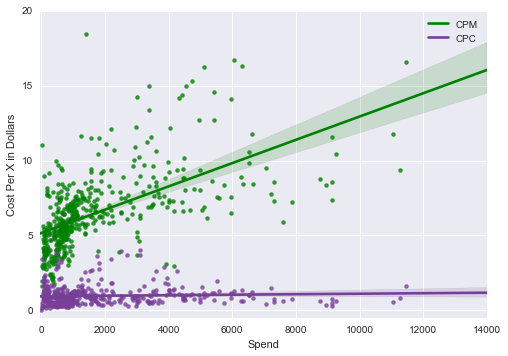

In [365]:
ax = sns.regplot(x="spend", y="CPM", data=fb_day, color='green')
ax = sns.regplot(x="spend", y="CPC", data=fb_day, color='#773f97')
ax = plt.xlabel('Spend')
ax = plt.ylabel('Cost Per X in Dollars')
ax = plt.xlim(xmin=-30)
ax = plt.ylim(ymin=-0.5)
ax = plt.legend(loc='best', labels=["CPM","CPC"])
plt.show()

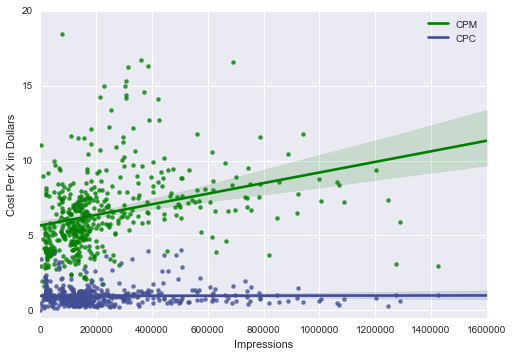

In [159]:
ax = sns.regplot(x="impressions", y="CPM", data=fb_day, color='green')
ax = sns.regplot(x="impressions", y="CPC", data=fb_day, color='#414e94')
ax = plt.xlabel('Impressions')
ax = plt.ylabel('Cost Per X in Dollars')
ax = plt.xlim(xmin=-30)
ax = plt.ylim(ymin=-0.5)
ax = plt.legend(loc='best', labels=["CPM","CPC"])
plt.show()

In [27]:
fb_day = fb_day.sort_index(axis=0, kind='mergesort')

,impressions,link_clicks,purchases_1day_click,purchases_1day_view,purchases_28day_click,purchases_28day_view,purchases_7day_click,purchases_7day_view,reach,spend,CPC,CPM,CTR
date,,,,,,,,,,,,,
2016-09-01,234818,5594.0,27.0,54.0,68.0,135.0,41.0,75.0,217637,2193.53,0.392122,9.341405,2.382271
2016-09-02,170489,4071.0,30.0,28.0,82.0,112.0,50.0,54.0,160394,1778.52,0.436875,10.431875,2.387837
2016-09-03,135324,3021.0,21.0,25.0,53.0,160.0,34.0,74.0,124987,1555.00,0.514730,11.490940,2.232420
2016-09-04,242808,2589.0,18.0,30.0,43.0,218.0,33.0,89.0,226614,1670.94,0.645400,6.881734,1.066275
2016-09-05,82980,924.0,5.0,15.0,11.0,147.0,6.0,53.0,80140,627.10,0.678680,7.557243,1.113521
2016-09-06,31402,200.0,0.0,0.0,1.0,7.0,0.0,6.0,30898,239.96,1.199800,7.641551,0.636902
2016-09-07,43154,596.0,0.0,0.0,1.0,4.0,0.0,3.0,38229,174.60,0.292953,4.045975,1.381100
2016-09-08,48872,953.0,0.0,0.0,0.0,0.0,0.0,0.0,36670,150.00,0.157398,3.069242,1.949992
2016-09-09,159677,1101.0,0.0,0.0,11.0,15.0,4.0,6.0,143633,854.93,0.776503,5.354121,0.689517


# Box Plot
A useful way to see distributions.

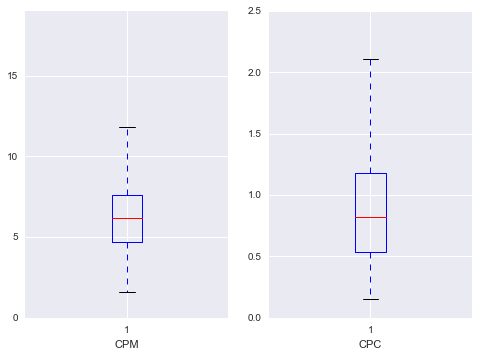

In [381]:
bxpdata= fb_day[['CPC','CPM']].values

_ = plt.figure()

_ = plt.subplot(1,2,1)
_ = plt.boxplot(fb_day.CPM)
_ = plt.ylim(0,19)
_ = plt.xlabel('CPM')

_ = plt.subplot(1,2,2)
_ = plt.boxplot(fb_day.CPC)
_ = plt.ylim(0,2.5)
_ = plt.xlabel('CPC')

_ = plt.show()

In [222]:
file = open("ga_all.pkl",'rb')
ga = pickle.load(file)
file.close()


# Google Analytics 
This is the most common type of Web Analyics looking at the most common KPIs by their internal channel Groupings 

In [223]:
ga.head()

,campaign,channel,date,medium,pv,sessions,source,revenue,orders
0,(not set),direct,2017-01-01,(none),19725,6324,(direct),4301,32
1,(not set),affiliatesR,2017-01-01,referral,4,1,11.147.143.194,0,0
2,(not set),affiliatesR,2017-01-01,referral,13,2,11.154.39.194,0,0
3,(not set),affiliatesR,2017-01-01,referral,12,1,114.31.36.70,0,0
4,(not set),affiliatesR,2017-01-01,referral,3,3,123.sogou.com,0,0


In [228]:
ga_day =  pd.pivot_table(ga,
                       values=['sessions',
                                'pv',
                                'revenue',
                                'orders'],
                       index=['date'],
                       aggfunc=np.sum)

In [229]:
ga_day.head()

,orders,pv,revenue,sessions
date,,,,
2015-01-01,181,98335,34433,22782
2015-01-02,82,74344,25733,17961
2015-01-03,50,76483,14988,21276
2015-01-04,67,69916,20044,18470
2015-01-05,66,76577,23827,21830


# Google Analytics - An Average Day
The same pattern we saw on Facebook Days we see repeated here in Google Analytics. Log-like distributions, with long tails of very high traffic and demand days. 

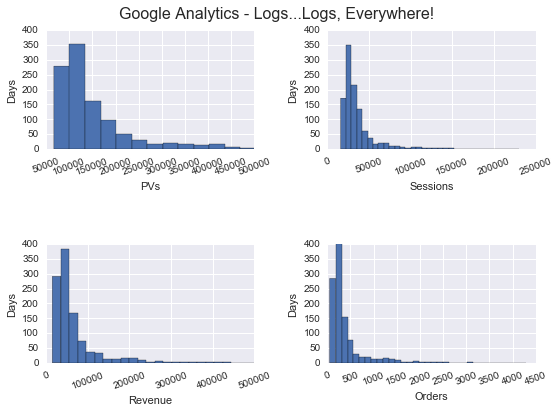

In [382]:
plt.figure(1)
plt.suptitle('Google Analytics - Logs...Logs, Everywhere!', fontsize=16)
plt.subplot(221) 
n = int(np.sqrt((ga_day.pv).count()))
_ = plt.hist(ga_day.pv, bins=n)
_ = plt.xlabel('PVs')
_ = plt.ylabel('Days')
_ = plt.axis([50000, 500000, 0, 400])
_ = plt.xticks( rotation=20 )

plt.subplot(222) 
n = int(np.sqrt((ga_day.sessions).count()))
_ = plt.hist(ga_day.sessions, bins=n)
_ = plt.xlabel('Sessions')
_ = plt.ylabel('Days')
_ = plt.axis([0, 250000, 0, 400])
_ = plt.xticks( rotation=20 )

plt.subplot(223) 
n = int(np.sqrt((ga_day.revenue).count()))
_ = plt.hist(ga_day.revenue, bins=n)
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Days')
_ = plt.axis([0, 500000, 0, 400])
_ = plt.xticks( rotation=20 )

plt.subplot(224) 
n = int(np.sqrt((ga_day.orders).count()))
_ = plt.hist(ga_day.orders, bins=n)
_ = plt.xlabel('Orders')
_ = plt.ylabel('Days')
_ = plt.axis([0, 4500, 0, 400])
_ = plt.xticks( rotation=20 )

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.8,
                    wspace=0.35)

plt.margins(0.2)

plt.show()


# Conversion Rates By Channel
This is the singular most important KPI in all of ecommerce - given the # of people who came to my site, what ratio converted to buy something? 

In [383]:
ga_cday =  pd.pivot_table(ga,
                       values=['sessions',
                                'pv',
                                'revenue',
                                'orders'],
                       index=['date','channel'],
                       aggfunc=np.sum)

In [386]:
ga_cday['CR'] = ga_cday['orders'] / ga_cday['sessions'] * 100

In [387]:
ga_cday.head(10)

orders     pv  revenue  sessions        CR
date       channel                                               
2015-01-01 Osearch         40  33879     7468      6374  0.627549
           Osocial         11   2367      846       569  1.933216
           Psearch         38  18161     6591      3374  1.126260
           affiliates      14  10001     1849      3039  0.460678
           direct          29   8617     8311      2107  1.376364
           display          1   1069      103       260  0.384615
           email           31  20287     3851      6114  0.507033
           other            0    184        0        49  0.000000
           referral        17   3770     5414       896  1.897321
2015-01-02 Osearch         21  32485     3923      6946  0.302332

In [389]:
ga_cday.reset_index(inplace=True)  #without resetting the index the sns will not recognize 

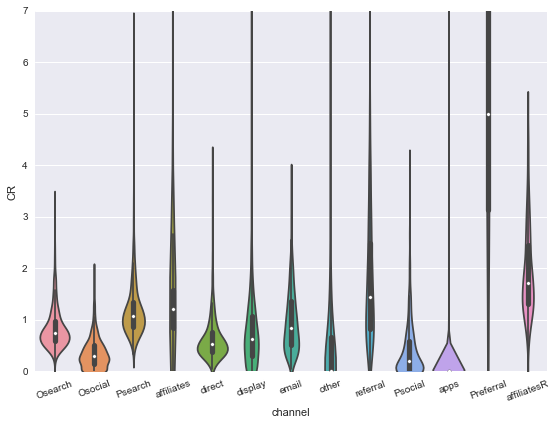

In [397]:
plt.figure()

ax = sns.violinplot(x="channel", y="CR", data=ga_cday)
ax = plt.xticks( rotation=20 )
ax = plt.ylim(0,7)


plt.subplots_adjust(top=0.99, bottom=0.08, left=0.10, right=0.99, hspace=0.8,
                    wspace=0.35)
plt.show()

In [251]:
ga_cday.head(10)

,date,channel,orders,pv,revenue,sessions,chn
0,2015-01-01,Osearch,40,33879,7468,6374,"(2015-01-01 00:00:00, Osearch)"
1,2015-01-01,Osocial,11,2367,846,569,"(2015-01-01 00:00:00, Osocial)"
2,2015-01-01,Psearch,38,18161,6591,3374,"(2015-01-01 00:00:00, Psearch)"
3,2015-01-01,affiliates,14,10001,1849,3039,"(2015-01-01 00:00:00, affiliates)"
4,2015-01-01,direct,29,8617,8311,2107,"(2015-01-01 00:00:00, direct)"
5,2015-01-01,display,1,1069,103,260,"(2015-01-01 00:00:00, display)"
6,2015-01-01,email,31,20287,3851,6114,"(2015-01-01 00:00:00, email)"
7,2015-01-01,other,0,184,0,49,"(2015-01-01 00:00:00, other)"
8,2015-01-01,referral,17,3770,5414,896,"(2015-01-01 00:00:00, referral)"
9,2015-01-02,Osearch,21,32485,3923,6946,"(2015-01-02 00:00:00, Osearch)"


KeyboardInterrupt: 

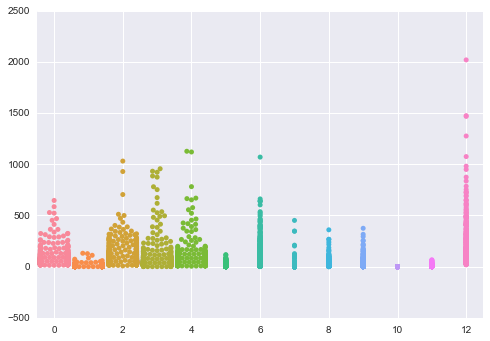

In [363]:
plt.figure()
ax = sns.swarmplot(x="channel", y="orders", data=ga_cday)
ax = plt.xticks( rotation=20 )
ax = plt.legend(loc='best', labels=["Channels"])
plt.show()

The Above Beeswarm is taking far too long to run, you can see the unfinished result above. 

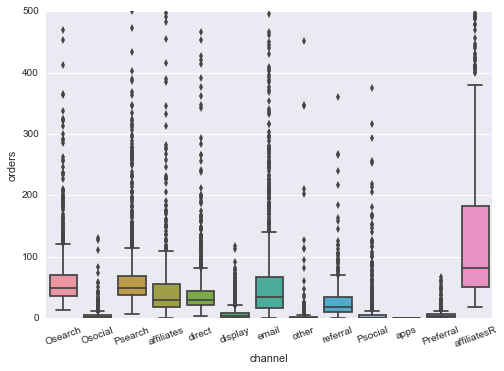

In [299]:
plt.figure()

ax = sns.boxplot(x="channel", y="orders", data=ga_cday)
ax = plt.xticks( rotation=20 )
ax = plt.ylim(0,500)
plt.show()

As both the Box Plot and Violin Plot show this data will need to undergo normalization processes as part of the model build.

My attempt to do a jointplot is styimied by the axis

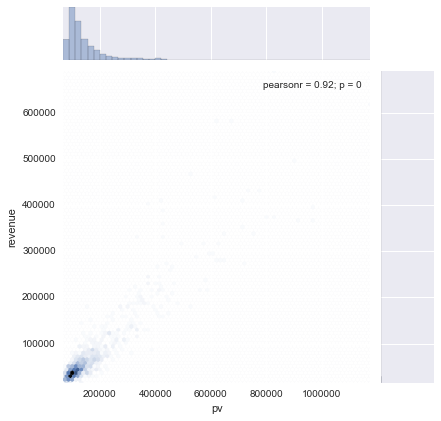

In [421]:
_ =sns.axes_style('dark')
_ = sns.jointplot("pv", "revenue", ga_day, kind='hex')
_ = plt.xlim(1, 40000)
#_ = plt.ylim(1, 90000)

plt.show()


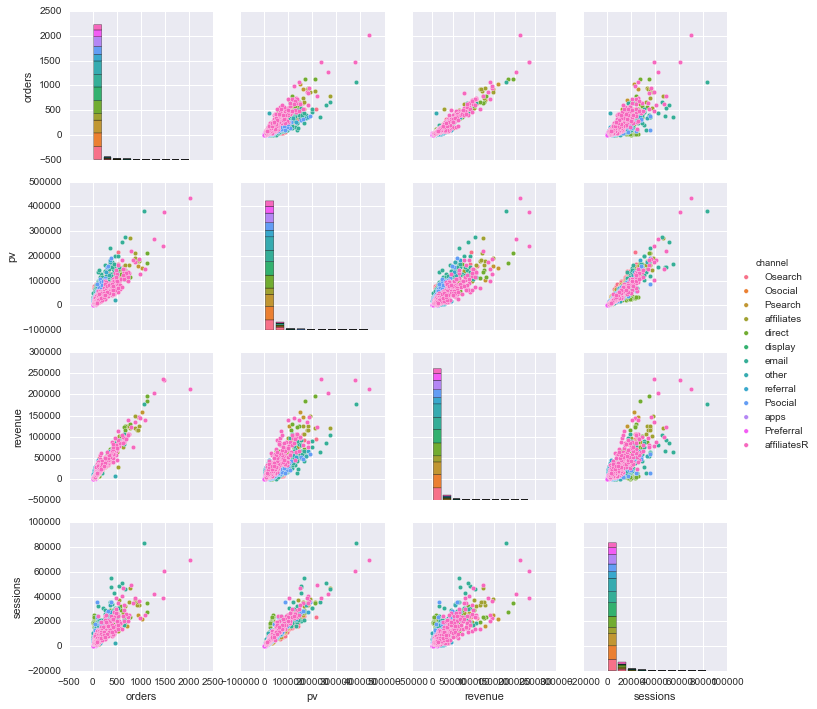

In [329]:
ax = sns.pairplot(ga_cday, hue='channel', size=2.5)
ax = plt.xticks( rotation=20 )

# Ad Words - Google Search
Lets see if we see the same Log Pattern here in the world of Ad Words

In [330]:
file = open("aw_all.pkl",'rb')
aw = pickle.load(file)
file.close()

In [331]:
aw.columns

Index([u'CPC', u'CPM', u'clicks', u'spend', u'adGroup', u'adCampaignID',
       u'adCreativeID', u'date', u'impressions', u'pv', u'sessions',
       u'revenue', u'orders'],
      dtype='object')

In [332]:
aw_day =  pd.pivot_table(aw,
                       values=['impressions',
                               'clicks', 
                               'pv',
                               'spend',
                               'sessions',
                               'orders',
                               'revenue'
                                ],
                       index=['date'],
                       aggfunc=np.sum)

In [333]:
aw_day.head()

,clicks,impressions,orders,pv,revenue,sessions,spend
date,,,,,,,
2015-01-01,2488,94100,181,98335,34444,22782,1743
2015-01-02,2458,53383,82,74344,25736,17961,1935
2015-01-03,2437,43584,50,76483,14991,21276,1741
2015-01-04,2483,44285,67,69916,20045,18470,1879
2015-01-05,2172,39956,66,76577,23829,21830,1867


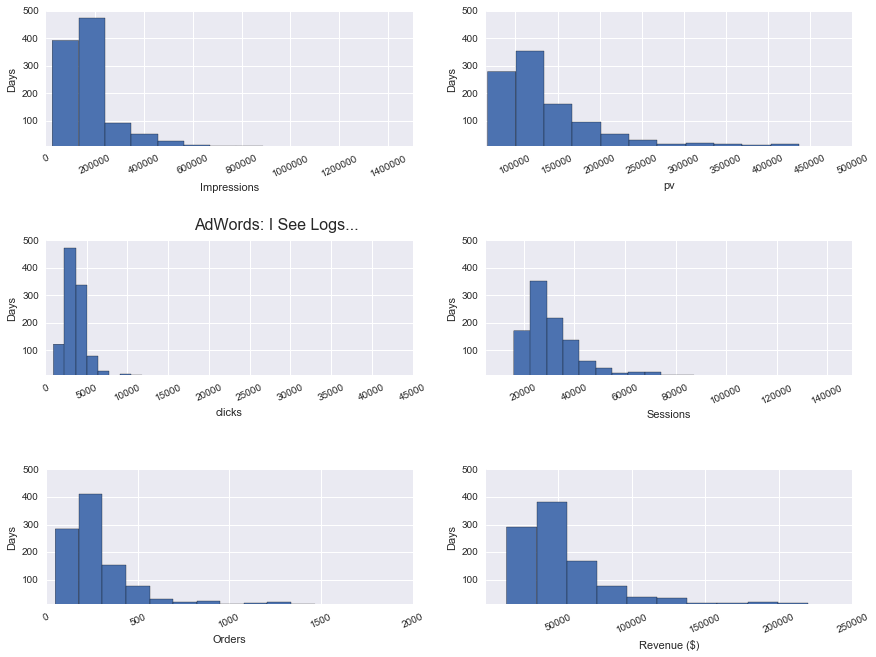

In [335]:
plt.figure(1)
plt.suptitle('AdWords: I See Logs...', fontsize=16)
plt.subplot(321) 
n = int(np.sqrt((aw_day.impressions).count()))
_ = plt.hist(aw_day.impressions, bins=n)
_ = plt.xlabel('Impressions')
_ = plt.ylabel('Days')
_ = plt.axis([10, 1500000, 10, 500])
_ = plt.xticks( rotation=25 )

plt.subplot(322) 
n = int(np.sqrt((aw_day.pv).count()))
_ = plt.hist(aw_day.pv, bins=n)
_ = plt.xlabel('pv')
_ = plt.ylabel('Days')
_ = plt.axis([65000, 500000, 10, 500])
_ = plt.xticks( rotation=25)

plt.subplot(323) 
n = int(np.sqrt((aw_day.clicks).count()))
_ = plt.hist(aw_day.clicks, bins=n)
_ = plt.xlabel('clicks')
_ = plt.ylabel('Days')
_ = plt.axis([10, 45000, 10, 500])
_ = plt.xticks( rotation=25)

plt.subplot(324) 
n = int(np.sqrt((aw_day.sessions).count()))
_ = plt.hist(aw_day.sessions, bins=n)
_ = plt.xlabel('Sessions')
_ = plt.ylabel('Days')
_ = plt.axis([5000, 150000, 10, 500])
_ = plt.xticks( rotation=25)

plt.subplot(325) 
n = int(np.sqrt((aw_day.orders).count()))
_ = plt.hist(aw_day.orders, bins=n)
_ = plt.xlabel('Orders')
_ = plt.ylabel('Days')
_ = plt.axis([0, 2000, 10, 500])
_ = plt.xticks( rotation=25)

plt.subplot(326) 
n = int(np.sqrt((aw_day.revenue).count()))
_ = plt.hist(aw_day.revenue, bins=n)
_ = plt.xlabel('Revenue ($)')
_ = plt.ylabel('Days')
_ = plt.axis([1000, 250000, 10, 500])
_ = plt.xticks( rotation=25)



plt.subplots_adjust(top=1.5, bottom=0.001, left=0.10, right=1.5, hspace=0.7, wspace=0.2)

plt.margins(0.2)

plt.show()

YES! We have logs, now lets see how our Media Performance KPIs as they scale with reach and budget: 

In [337]:
aw_day['CPC'] = aw_day['spend'] / aw_day['clicks']
aw_day['CPM'] = (aw_day['spend'] * 1000) / aw_day['impressions']
aw_day['CTR'] = (aw_day['clicks'] / aw_day['impressions']) * 100


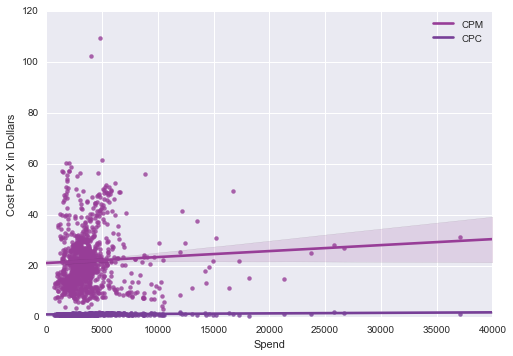

In [338]:
ax = sns.regplot(x="spend", y="CPM", data=aw_day, color='#973d97')
ax = sns.regplot(x="spend", y="CPC", data=aw_day, color='#773f97')
ax = plt.xlabel('Spend')
ax = plt.ylabel('Cost Per X in Dollars')
ax = plt.xlim(xmin=-30)
ax = plt.ylim(ymin=-0.5)
ax = plt.legend(loc='best', labels=["CPM","CPC"])
plt.show()

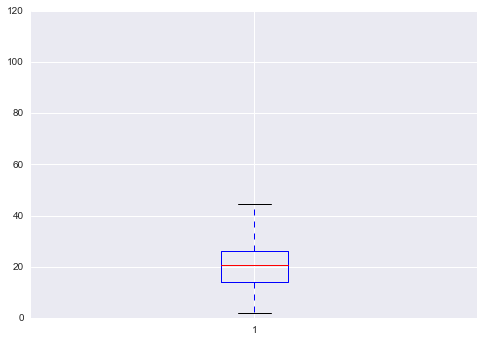

In [339]:
gbxpdata= aw_day[['CPC','CPM']]
plt.figure()
plt.boxplot(aw_day.CPM)
plt.show()

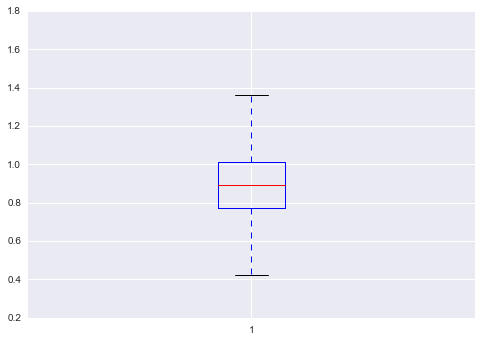

In [340]:
plt.figure()
plt.boxplot(aw_day.CPC)
plt.show()

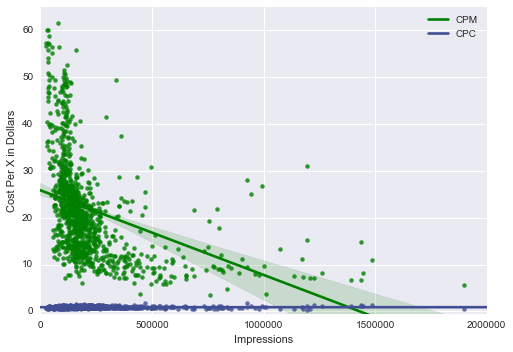

In [341]:
ax = sns.regplot(x="impressions", y="CPM", data=aw_day, color='green')
ax = sns.regplot(x="impressions", y="CPC", data=aw_day, color='#414e94')
ax = plt.xlabel('Impressions')
ax = plt.ylabel('Cost Per X in Dollars')
ax = plt.xlim(-30,2000000)
ax = plt.ylim(-0.5,65)
ax = plt.legend(loc='best', labels=["CPM","CPC"])
plt.show()

This is an interesting result, and speaks to the difference between Facebook and AdWords. Ad Words have a limited number of impressions aviable, and many people bidding on them. That results in a driving up of the 'price of being seen'/CPM, but the CPC remains tighly bound around its mean. 

Lets see how that compares to Facebook's CPC and CPM: 

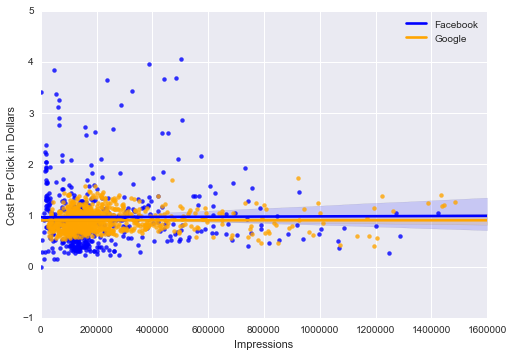

In [343]:
ax = sns.regplot(x="impressions", y="CPC", data=fb_day, color='blue')
ax = sns.regplot(x="impressions", y="CPC", data=aw_day, color='orange')
ax = plt.xlabel('Impressions')
ax = plt.ylabel('Cost Per Click in Dollars')
ax = plt.xlim(xmin=-30)
ax = plt.legend(loc='best', labels=["Facebook","Google"])
plt.show()

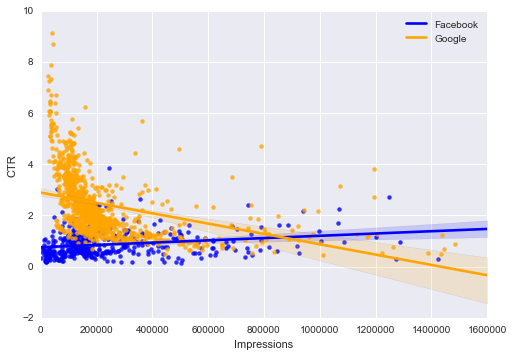

In [413]:
ax = sns.regplot(x="impressions", y="CTR", data=fb_day, color='blue')
ax = sns.regplot(x="impressions", y="CTR", data=aw_day, color='orange')
ax = plt.xlabel('Impressions')
ax = plt.ylabel('CTR')
ax = plt.xlim(xmin=-30)
ax = plt.legend(loc='best', labels=["Facebook","Google"])
plt.show()

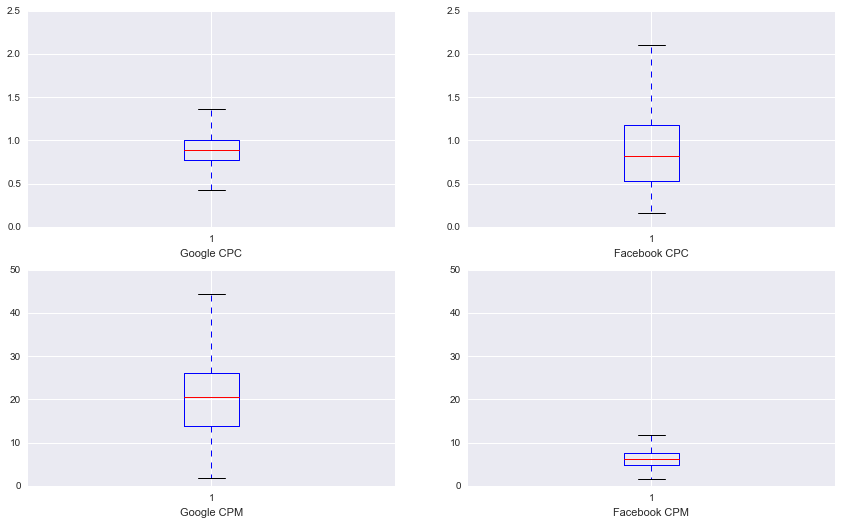

In [406]:
plt.figure()

plt.subplot(2,2,1)
plt.boxplot(aw_day.CPC)
plt.ylim(0,2.5)
plt.xlabel('Google CPC')

plt.subplot(2,2,2)
plt.boxplot(fb_day.CPC)
plt.ylim(0,2.5)
plt.xlabel('Facebook CPC')

plt.subplot(2,2,3)
plt.boxplot(aw_day.CPM)
plt.ylim(0,50)
plt.xlabel('Google CPM')

plt.subplot(2,2,4)
plt.boxplot(fb_day.CPM)
plt.ylim(0,50)
plt.xlabel('Facebook CPM')
plt.subplots_adjust(top=1.2, bottom=0.001, left=0.10, right=1.5, hspace=0.2, wspace=0.2)

plt.show()

# The Central Advertising Dynamic
Google has an upper limit on the number of impressions it has to sell, so its Cost of Reach is very high with a Mean just above $20, but the cost of a action is bounded closely from $0.45-$1.45. 

Facebook is the inverse, it has a nearly unlimited supply of impressions, and can create more for the right price, just over $10. But the cost of a Click is much more variable as a result. Because you are bidding on a person, and not directly on their intent.  

In [412]:
print('FB CPC Mean:', fb_day.CPC.mean(),
     'FB CPC Median:', fb_day.CPC.median())
print('AW CPC Mean:', aw_day.CPC.mean(),
     'AW CPC Median:', aw_day.CPC.median())

('FB CPC Mean:', 0.9721137369479388, 'FB CPC Median:', 0.8196858445238384)
('AW CPC Mean:', 0.9061981678558011, 'AW CPC Median:', 0.8908961779955236)


In [408]:
print('AW CPC Mean:', AW_day.CPC.mean(),
     'AW CPC Median:', AW_day.CPC.median())

0.9061981678558011